# 123

(1002, 200, 200)
(104, 200, 200)
(1002,)
(1002, 200, 200)
(1002,)
(104,)
(1002, 200, 200, 1)
(104, 200, 200, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 1)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 49, 49, 32)        4640      
        

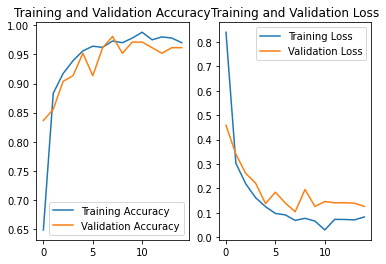

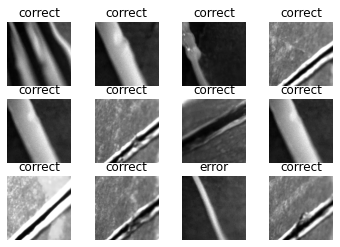

1
2
3
4
5
6
7
8
9
10
11
12
1
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
2
38
39
40
41
42
3
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
4
60
61
62
63
64
65
66
67
68
69
70
71
5
72
73
74
75
76
77
78
79
80
81
82
83
84
85
6
86
87
88
89
90
91
92
93
94
[18, 2, 0, 0, 0, 0]
[1, 17, 0, 3, 0, 0]
[0, 0, 25, 0, 0, 0]
[0, 0, 0, 12, 0, 0]
[0, 0, 0, 0, 22, 0]
correct is :
0.94


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_train_path = '/Users/moliji/design/data_x_train.npy'
y_train_path = '/Users/moliji/design/data_y_train.npy'
x_test_path = '/Users/moliji/design/data_x_test.npy'
y_test_path = '/Users/moliji/design/data_y_test.npy'

train_x = np.load(x_train_path)
test_x = np.load(x_test_path)

y_train = np.load(y_train_path)
y_test = np.load(y_test_path)

print(train_x.shape)
print(test_x.shape)
print(y_train.shape)

X_train = tf.cast(train_x / 255.0, tf.float32)
X_test = tf.cast(test_x / 255.0, tf.float32)
y_train = tf.cast(y_train, tf.int16)
y_test = tf.cast(y_test, tf.int16)

print(train_x.shape)

print(y_train.shape)
print(y_test.shape)

X_train = tf.reshape(X_train, (1002, 200, 200, 1))
X_test = tf.reshape(X_test, (104, 200, 200, 1))
print(X_train.shape)
print(X_test.shape)

model = tf.keras.Sequential()

# unit 1
model.add(tf.keras.layers.MaxPool2D(pool_size=(4, 4), input_shape=(200, 200, 1)))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same',
                                 activation=tf.nn.relu))
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same',
                                 activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=1))

# unit 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same',
                                 activation=tf.nn.relu))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same',
                                 activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

# unit 3
model.add(tf.keras.layers.Flatten())
# unit 4
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.summary()

history = model.fit(X_train, y_train, batch_size=30, epochs=15, validation_data=(X_test, y_test))
model.evaluate(X_test, y_test, verbose=2)

if __name__ == '__main__':
    acc = history.history['sparse_categorical_accuracy']
    val_acc = history.history['val_sparse_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

    for i in range(12):
        num = np.random.randint(1, 100)
        plt.subplot(3, 4, i+1)
        plt.axis('off')
        # test_x_reshape = tf.reshape(train_x[num], (1, 200, 200))
        # y_pred = np.argmax(model.predict(test_x_reshape))
        test_x_reshape = tf.reshape(test_x[num], (1, 200, 200, 1))
        y_pred = np.argmax(model.predict(test_x_reshape))

        if y_pred == y_test[num]:
            plt.title('correct')
        else:
            plt.title('error')
        # plt.title('y_pred = %d\ny = %d' % (y_pred, y_test[num]))
        plt.imshow(test_x[num], cmap='gray')
    plt.show()

    correct = 0
    error = 0
    label0 = [0, 0, 0, 0, 0, 0]
    label1 = [0, 0, 0, 0, 0, 0]
    label2 = [0, 0, 0, 0, 0, 0]
    label3 = [0, 0, 0, 0, 0, 0]
    label4 = [0, 0, 0, 0, 0, 0]
    for i in range(100):
        test_x_reshape = tf.reshape(test_x[i], (1, 200, 200, 1))
        y_pred = np.argmax(model.predict(test_x_reshape))
        if y_pred == 0:
            if y_test[i] == 0:
                label0[0] += 1
            elif y_test[i] == 1:
                label0[1] += 1
            elif y_test[i] == 2:
                label0[2] += 1
            elif y_test[i] == 3:
                label0[3] += 1
            elif y_test[i] == 4:
                label0[4] += 1
            else:
                label0[5] += 1
                print('error')

        if y_pred == 1:
            if y_test[i] == 0:
                label1[0] += 1
            elif y_test[i] == 1:
                label1[1] += 1
            elif y_test[i] == 2:
                label1[2] += 1
            elif y_test[i] == 3:
                label1[3] += 1
            elif y_test[i] == 4:
                label1[4] += 1
            else:
                label1[5] += 1
                print('error')

        if y_pred == 2:
            if y_test[i] == 0:
                label2[0] += 1
            elif y_test[i] == 1:
                label2[1] += 1
            elif y_test[i] == 2:
                label2[2] += 1
            elif y_test[i] == 3:
                label2[3] += 1
            elif y_test[i] == 4:
                label2[4] += 1
            else:
                label2[5] += 1
                print('error')

        if y_pred == 3:
            if y_test[i] == 0:
                label3[0] += 1
            elif y_test[i] == 1:
                label3[1] += 1
            elif y_test[i] == 2:
                label3[2] += 1
            elif y_test[i] == 3:
                label3[3] += 1
            elif y_test[i] == 4:
                label3[4] += 1
            else:
                label3[5] += 1
                print('error')

        if y_pred == 4:
            if y_test[i] == 0:
                label4[0] += 1
            elif y_test[i] == 1:
                label4[1] += 1
            elif y_test[i] == 2:
                label4[2] += 1
            elif y_test[i] == 3:
                label4[3] += 1
            elif y_test[i] == 4:
                label4[4] += 1
            else:
                label4[5] += 1
                print('error')

        if y_pred == y_test[i]:
            correct += 1
            print(correct)
        else:
            error += 1
            print(error)
    print(label0)
    print(label1)
    print(label2)
    print(label3)
    print(label4)
    print('correct is :')
    print(correct / (correct + error))

# 1

## 2

- qd1
- qd2

`hello world`

$\int_{x=0}^\infty$

`![](./123.jpeg)`

<img src="./123.jpeg" width=500 />